# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.988854e+01     8.220690e+00
 * time: 0.0014598369598388672
     1     2.716327e+01     4.182406e+00
 * time: 0.005440950393676758
     2     1.748874e+01     3.172404e+00
 * time: 0.010651826858520508
     3     1.136938e+01     1.946861e+00
 * time: 0.015481948852539062
     4     1.038836e+01     1.968745e+00
 * time: 0.01925802230834961
     5     9.536140e+00     1.309305e+00
 * time: 0.023102998733520508
     6     9.077835e+00     9.330823e-01
 * time: 0.026959896087646484
     7     8.843227e+00     7.701323e-01
 * time: 0.031207799911499023
     8     8.614692e+00     7.258496e-01
 * time: 0.03478193283081055
     9     8.364681e+00     5.484910e-01
 * time: 0.03842782974243164
    10     8.197896e+00     2.836326e-01
 * time: 0.04198193550109863
    11     8.173063e+00     8.235417e-01
 * time: 0.045015811920166016
    12     8.108162e+00     6.279121e-01
 * time: 0.04782295227050781
    13     8.066958e+00     6.410037e-01

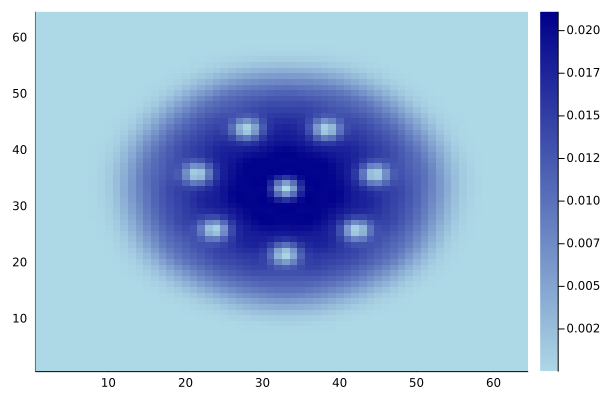

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)